In [3]:
path = 'data/raw-experimental-data/2025-08-11-ParticleTrackingCalibrationTests/20mm depth - 0p5mm steps/Calibration01/Camera1'

In [9]:
from src.visualization import read_and_visualize_tiff

Processing: Camera1_22.tif
Image shape: (1600, 2560)
Data type: uint8
Min pixel value: 0
Max pixel value: 255
Mean pixel value: 1.98


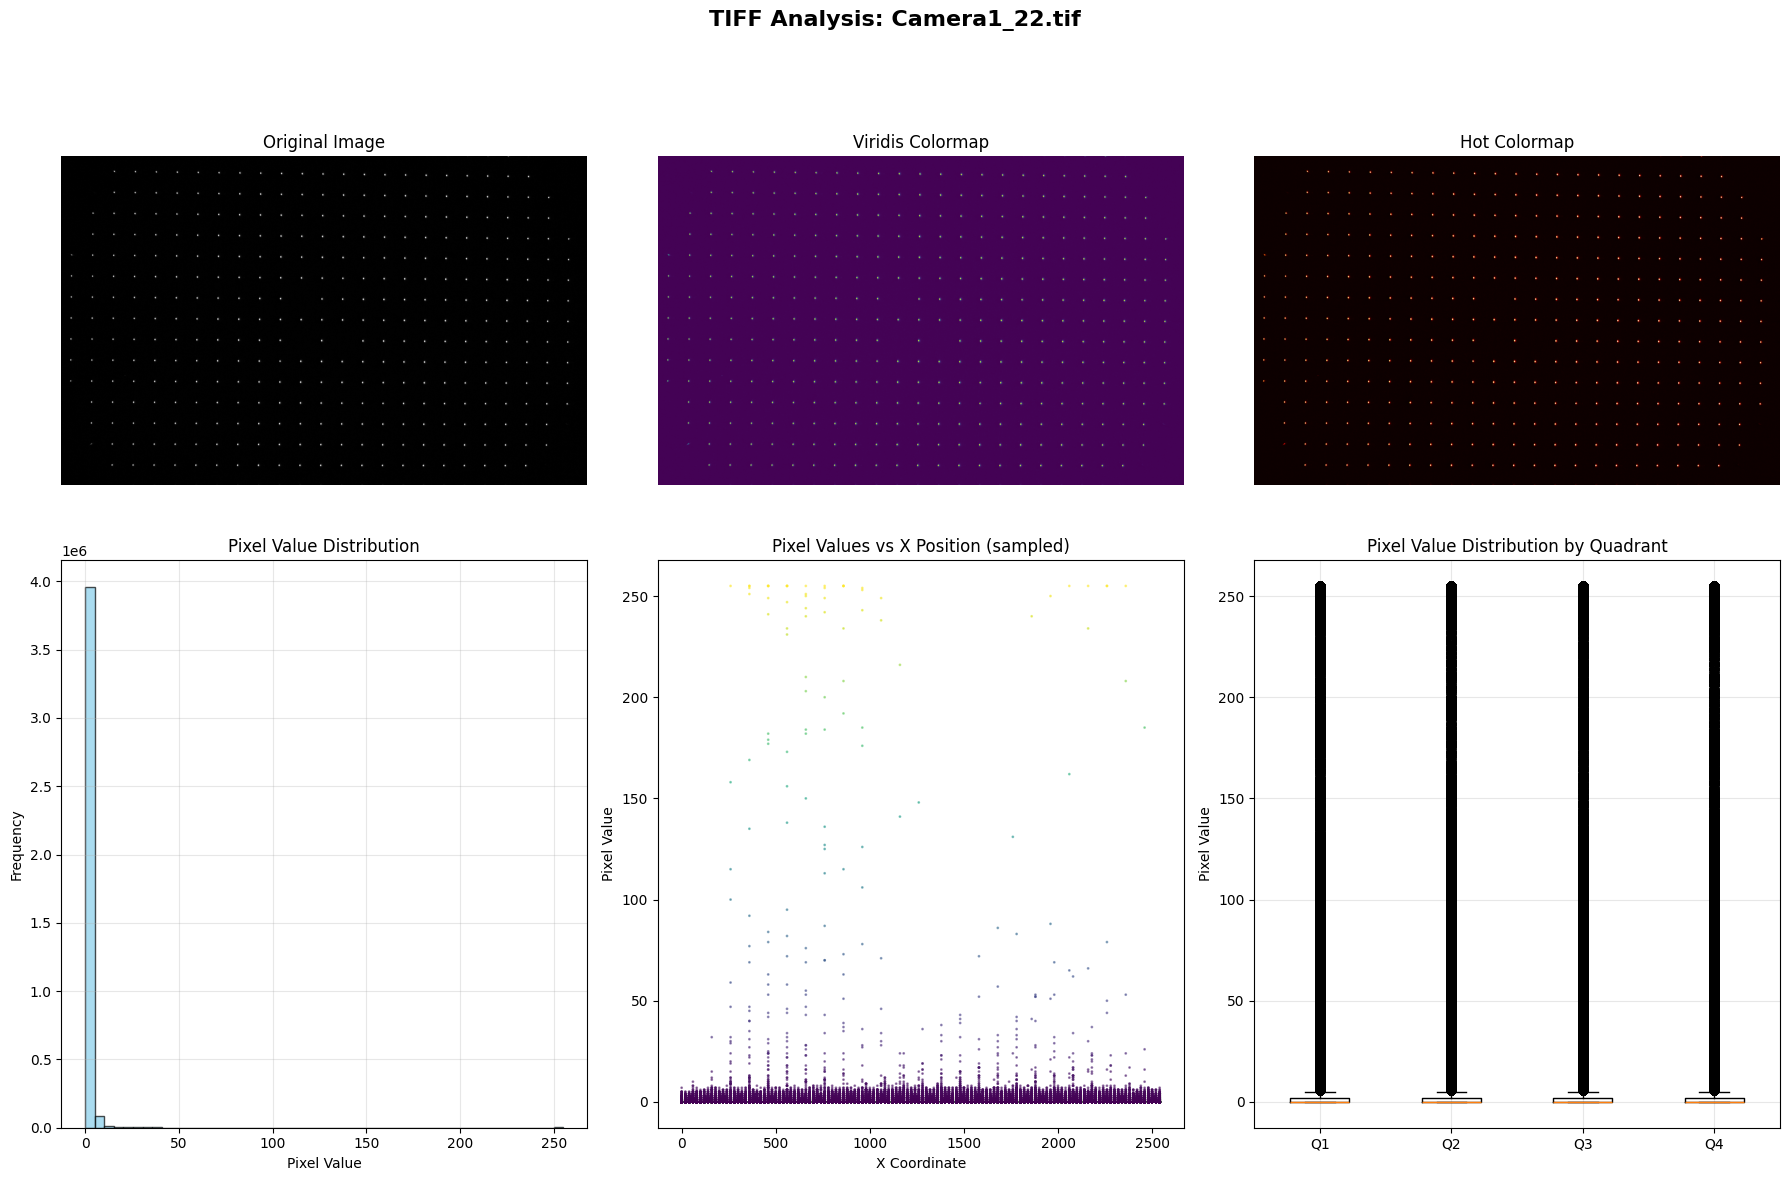

Please update the folder_path variable with your actual folder path.
Then uncomment one of the usage options above.


In [10]:
# Option 1: Process first TIFF file found
img_data = read_and_visualize_tiff(path)
    
# Option 2: Process specific file
# img_data = read_and_visualize_tiff(folder_path, "your_file.tif")
    
# Option 3: Get overview of all TIFF files
# batch_process_tiffs(folder_path)
    
print("Please update the folder_path variable with your actual folder path.")
print("Then uncomment one of the usage options above.")